**Multiple Linear Regression (MLR) || captura**


**Import modules**

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, train_test_split, cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import LabelEncoder


**Load dataset**

In [2]:
# Load training data
filename1 = 'captura.csv'
#filename1 = 'bank-additional-full.csv'
bank_df = pd.read_csv(filename1, delimiter=';', header=0)
bank_df.head()

,No.,Time,Source,Destination,Protocol,Length
0,1,0.000000,Alcatel-_19:39:41,Spanning-tree-(for-bridges)_00,STP,60
1,2,0.130454,68.55.0.1,224.9.9.4,UDP,783
2,3,0.147551,192.168.168.1,192.168.168.1,ICMP,110
3,4,0.147606,132.32.128.200,132.32.128.200,ICMP,103
4,5,0.374202,172.31.48.1,255.255.255.255,DHCP,367



**Data preprocessing**

**Input variables:**

Bank client data:

1. age (numeric)
   
2. job: type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

3. marital: marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

4. education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

5. default: has credit in default? (categorical: "no","yes","unknown")

6. housing: has housing loan? (categorical: "no","yes","unknown")

7. loan: has personal loan? (categorical: "no","yes","unknown")

related with the last contact of the current campaign:

8. contact: contact communication type (categorical: "cellular","telephone")

9. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

10. day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

11. duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14. previous: number of contacts performed before this campaign and for this client (numeric)

15. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

social and economic context attributes

16. emp.var.rate: employment variation rate - quarterly indicator (numeric)

17. cons.price.idx: consumer price index - monthly indicator (numeric)

18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19. euribor3m: euribor 3 month rate - daily indicator (numeric)

20. nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21. y - has the client subscribed a term deposit? (binary: "yes","no")

In [3]:
# get all categorical columns in the dataframe
catCols = [col for col in bank_df.columns if bank_df[col].dtype=="O"]
print(catCols)

lb_make = LabelEncoder()

for item in catCols:
    bank_df[item] = lb_make.fit_transform(bank_df[item])

print(bank_df)

['Time', 'Source', 'Destination', 'Protocol']
    No.  Time  Source  Destination  Protocol  Length
0     1     0      22            7         5      60
1     2     1       4            3         6     783
2     3     2       2            1         2     110
3     4     3       0            0         2     103
4     5     5       1            4         1     367
5     6     4       1            4         1     357
6     7     6      23            5         0      42
7     8     7      19            3         6     166
8     9     9      17            3         6     166
9    10     8      24            5         0      42
10   11    10      16            3         6     198
11   12    12      24            5         0      42
12   13    11      11            3         6     166
13   14    13      23            5         0      42
14   15    14      18            3         6     166
15   16    15      22            6         3     179
16   17    16       9            3         6     804


In [4]:
train_df, test_df = train_test_split(bank_df, test_size=0.2)
print(train_df)
print(test_df)

    No.  Time  Source  Destination  Protocol  Length
13   14    13      23            5         0      42
42   43    42      11            3         6     804
43   44    43       8            3         6     166
1     2     1       4            3         6     783
11   12    12      24            5         0      42
29   30    29       3            2         4      82
10   11    10      16            3         6     198
3     4     3       0            0         2     103
26   27    25      12            3         6     166
37   38    37      14            3         6     207
14   15    14      18            3         6     166
30   31    28      16            3         6     207
34   35    34      21            3         6     166
40   41    40      23            5         0      42
27   28    27       0            0         2      84
23   24    24       3            2         4      92
44   45    44      23            5         0      42
36   37    36      22            7         5  


**Cross validation**

In [6]:
X_train = train_df.iloc[:,0:4].to_numpy()
y_train = train_df.iloc[:,4].astype(int).to_numpy()

clf = LinearRegression()
# 4-fold cross-validation
scores = cross_val_score(clf, X_train, y_train, cv=4)
print(scores)
print(np.mean(scores))

[ 0.14257132 -0.15070907 -0.2643961  -0.36991046]
-0.16061107877754152



Training

In [7]:
# Create model
clf = LinearRegression()

# Training
clf.fit(X_train, y_train)

LinearRegression()


**Test**

Model accuracy: 0.0


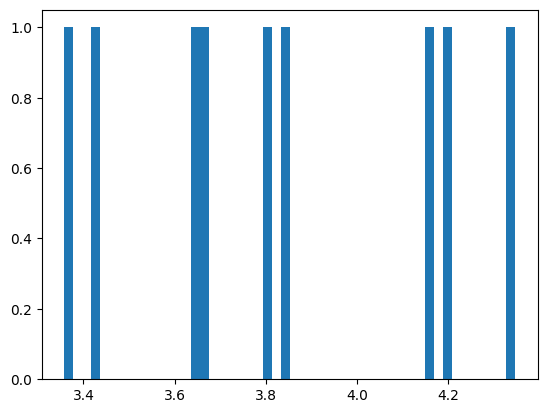

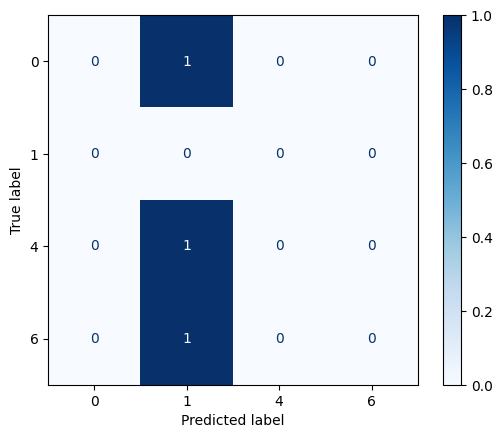

Confusion matrix:
 [[0 2 0 0]
 [0 0 0 0]
 [0 1 0 0]
 [0 6 0 0]]
Percentage classification error obtained from test set: 100.0%


In [8]:
X_test = test_df.iloc[:,0:4].to_numpy()
y_test = test_df.iloc[:,4].astype(int).to_numpy()

# Generate predictions
y_pred = clf.predict(X_test)
#print(y_pred)
#print(y_test)
plt.hist(y_pred, bins=50)

# Use a threshold to select the probabilities that will determine class 0 or 1
threshold = 0.5
y_pred = np.where(y_pred > threshold, 1,0)

# Evaluate by means of accuracy
accuracy = accuracy_score(y_test.astype(int), y_pred.astype(int))
print(f'Model accuracy: {accuracy}')

# Evaluate by means of a confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test.astype(int), y_pred.astype(int),
                                               cmap=plt.cm.Blues,
                                               normalize='true')
plt.show()

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

# Calculate the percentage classification error obtained from test set
percentage_classification_error = 100 * ((cm[0][1] + cm[1][0]) / (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0]))
print(f'Percentage classification error obtained from test set: {percentage_classification_error}%')

In [11]:
bank_mlr_results = {'real_value': y_test,
                    'prediction': y_pred}

df = pd.DataFrame(bank_mlr_results)

df.to_csv('captura.csv')